In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  61491.000000  61491.000000  61491.000000  61491.000000  61491.000000   
mean   32315.344034     -0.237271     -0.009245      0.686906      0.170027   
std    13799.588573      1.858811      1.650873      1.437527      1.382308   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    26758.500000     -0.994568     -0.583205      0.201620     -0.725042   
50%    36064.000000     -0.244368      0.075028      0.778314      0.184554   
75%    42644.000000      1.154727      0.731859      1.411352      1.052198   
max    49863.000000      1.960497     18.183626      4.101716     16.715537   

                 V5            V6            V7            V8            V9  \
count  61491.000000  61491.000000  61491.000000  61491.000000  61491.000000   
mean      -0.262238      0.102613     -0.115160      0.057488      0.053122   
std        1.387481      1.305512      1.246739    

In [4]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0026578831509775466
Fraud Cases: 163
Valid Transactions: 61327


In [5]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,163.000000
mean,93.113006
std,224.038967
min,0.000000
25%,1.000000
50%,4.560000
75%,99.990000
max,1809.680000


In [6]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,61327.000000
mean,95.440607
std,268.755957
min,0.000000
25%,7.680000
50%,26.050000
75%,87.500000
max,19656.530000


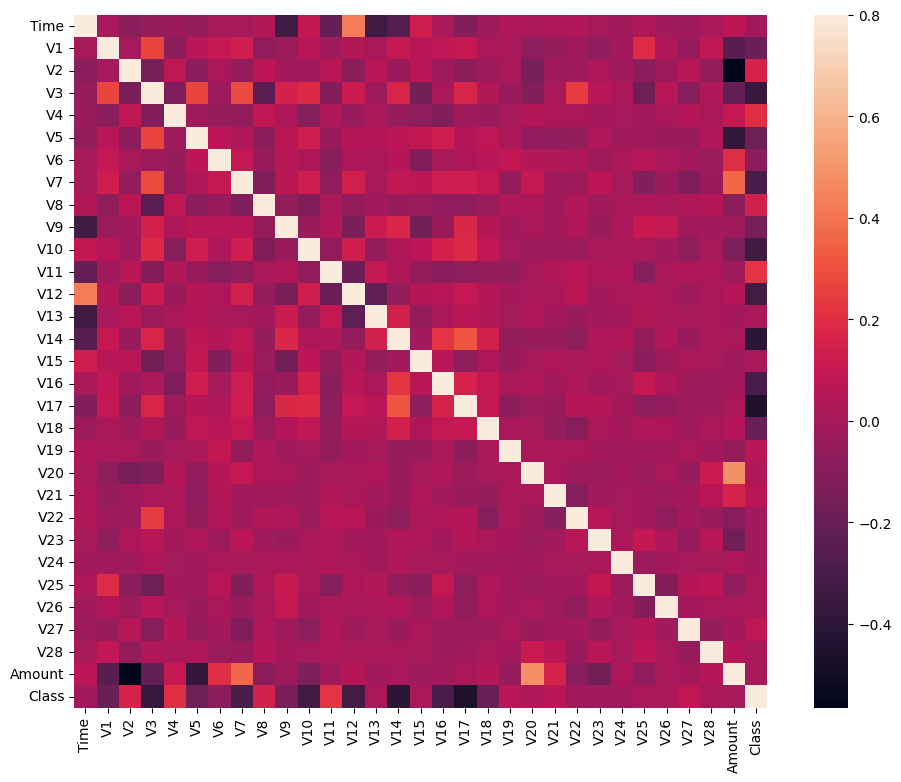

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [11]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

# Drop rows where 'Class' is NaN
data.dropna(subset=['Class'], inplace=True)
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(61490, 30)
(61490,)


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

Model Evaluation Metrics:
Accuracy: 0.9992
Precision: 1.0000
Recall: 0.7674
F1-Score: 0.8684
Matthews Correlation Coefficient: 0.8757


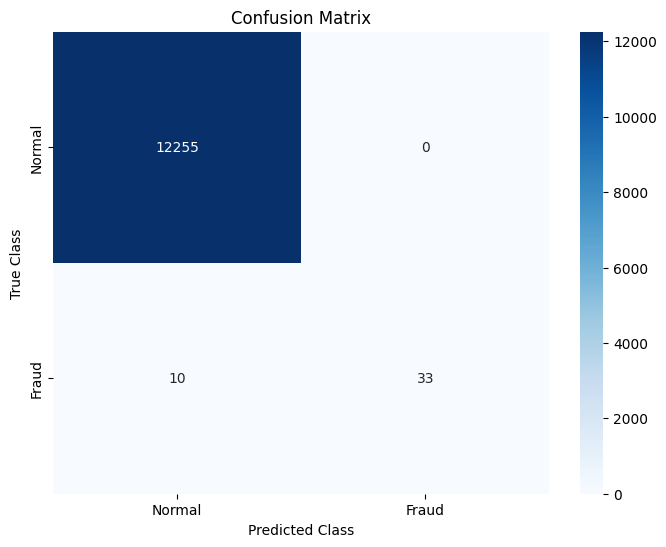

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()